In [21]:
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
data = pd.read_csv("data/simpsons_episodes.csv")
data.head()

,id,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views
0,10,http://static-media.fxx.com/img/FX_Networks_-_...,7.4,1511.0,10,10,1990-03-25,1990,7G10,1,Homer's Night Out,30.3,http://www.simpsonsworld.com/video/275197507879,50816.0
1,12,http://static-media.fxx.com/img/FX_Networks_-_...,8.3,1716.0,12,12,1990-04-29,1990,7G12,1,Krusty Gets Busted,30.4,http://www.simpsonsworld.com/video/288019523914,62561.0
2,14,http://static-media.fxx.com/img/FX_Networks_-_...,8.2,1638.0,1,14,1990-10-11,1990,7F03,2,"Bart Gets an ""F""",33.6,http://www.simpsonsworld.com/video/260539459671,59575.0
3,17,http://static-media.fxx.com/img/FX_Networks_-_...,8.1,1457.0,4,17,1990-11-01,1990,7F01,2,Two Cars in Every Garage and Three Eyes on Eve...,26.1,http://www.simpsonsworld.com/video/260537411822,64959.0
4,19,http://static-media.fxx.com/img/FX_Networks_-_...,8.0,1366.0,6,19,1990-11-15,1990,7F08,2,Dead Putting Society,25.4,http://www.simpsonsworld.com/video/260539459670,50691.0


In [3]:
result = data.sort_values("number_in_series", ascending=True)
result

,id,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views
241,1,http://static-media.fxx.com/img/FX_Networks_-_...,8.2,3734.0,1,1,1989-12-17,1989,7G08,1,Simpsons Roasting on an Open Fire,26.70,http://www.simpsonsworld.com/video/273376835817,171408.0
242,2,http://static-media.fxx.com/img/FX_Networks_-_...,7.8,1973.0,2,2,1990-01-14,1990,7G02,1,Bart the Genius,24.50,http://www.simpsonsworld.com/video/283744835990,91423.0
550,3,http://static-media.fxx.com/img/FX_Networks_-_...,7.5,1709.0,3,3,1990-01-21,1990,7G03,1,Homer's Odyssey,27.50,http://www.simpsonsworld.com/video/273381443699,78072.0
243,4,http://static-media.fxx.com/img/FX_Networks_-_...,7.8,1701.0,4,4,1990-01-28,1990,7G04,1,There's No Disgrace Like Home,20.20,http://www.simpsonsworld.com/video/273392195780,67378.0
525,5,http://static-media.fxx.com/img/FX_Networks_-_...,8.1,1732.0,5,5,1990-02-04,1990,7G05,1,Bart the General,27.10,http://www.simpsonsworld.com/video/300934723994,63129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,596,http://static-media.fxx.com/img/FX_Networks_-_...,6.9,210.0,22,596,2016-05-22,2016,VABF15,27,Orange Is the New Yellow,2.54,http://www.simpsonsworld.com/video/772111939897,276.0
576,597,http://static-media.fxx.com/img/FX_Networks_-_...,6.6,104.0,1,597,2016-09-25,2016,VABF20,28,Monty Burns' Fleeing Circus,3.36,http://www.simpsonsworld.com/video/772654659902,994.0
234,598,NaN,NaN,NaN,2,598,2016-10-02,2016,VABF18,28,"Friends and Family""[203]",NaN,NaN,NaN
235,599,NaN,NaN,NaN,3,599,2016-10-09,2016,VABF17,28,"The Town""[205]",NaN,NaN,NaN


In [4]:
group_year = data["original_air_year"].value_counts()
group_year

1997    27
1991    25
2005    25
1995    25
2010    24
1998    24
1992    23
1994    23
1999    23
2003    23
2014    23
2006    22
2007    22
2015    22
2011    22
1996    22
2013    22
2002    22
1990    21
2000    21
2009    21
2012    21
1993    21
2004    20
2001    19
2008    19
2016    17
1989     1
Name: original_air_year, dtype: int64

In [5]:
group_rating = data["imdb_rating"].value_counts()
group_rating

7.3    48
7.0    42
7.1    42
6.9    40
7.2    39
6.7    29
8.2    29
7.7    27
8.0    25
6.6    23
6.8    21
6.5    18
8.3    18
7.5    18
8.1    18
7.9    16
8.5    16
6.3    16
7.8    14
7.6    12
8.4    10
7.4    10
6.4     9
8.6     9
9.0     8
8.7     7
8.8     6
8.9     5
6.2     4
5.8     3
6.1     3
5.9     2
9.2     2
9.1     2
5.7     2
6.0     1
4.5     1
5.1     1
5.6     1
Name: imdb_rating, dtype: int64

In [6]:
result = data.sort_values("imdb_rating", ascending=True)
result

,id,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views
193,508,http://static-media.fxx.com/img/FX_Networks_-_...,4.5,1215.0,22,508,2012-05-20,2012,PABF14,23,Lisa Goes Gaga,4.82,http://www.simpsonsworld.com/video/233190467851,44434.0
71,189,http://static-media.fxx.com/img/FX_Networks_-_...,5.1,1119.0,11,189,1998-01-04,1998,5F24,9,"All Singing, All Dancing",8.90,http://www.simpsonsworld.com/video/294808131518,15780.0
107,286,http://static-media.fxx.com/img/FX_Networks_-_...,5.6,721.0,17,286,2002-04-21,2002,DABF12,13,Gump Roast,12.30,http://www.simpsonsworld.com/video/302888515845,46335.0
188,498,http://static-media.fxx.com/img/FX_Networks_-_...,5.7,562.0,12,498,2012-01-29,2012,PABF05,23,Moe Goes from Rags to Riches,5.12,http://www.simpsonsworld.com/video/230553667901,39838.0
171,457,http://static-media.fxx.com/img/FX_Networks_-_...,5.7,675.0,16,457,2010-03-28,2010,MABF10,21,The Greatest Story Ever D'ohed,5.69,http://www.simpsonsworld.com/video/279809091713,44070.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,155,http://static-media.fxx.com/img/FX_Networks_-_...,9.2,2439.0,2,155,1996-11-03,1996,3F23,8,You Only Move Twice,13.90,http://www.simpsonsworld.com/video/306390595776,79609.0
537,176,http://static-media.fxx.com/img/FX_Networks_-_...,9.2,2256.0,23,176,1997-05-04,1997,4F19,8,Homer's Enemy,11.80,http://www.simpsonsworld.com/video/436466755640,74177.0
234,598,NaN,NaN,NaN,2,598,2016-10-02,2016,VABF18,28,"Friends and Family""[203]",NaN,NaN,NaN
235,599,NaN,NaN,NaN,3,599,2016-10-09,2016,VABF17,28,"The Town""[205]",NaN,NaN,NaN


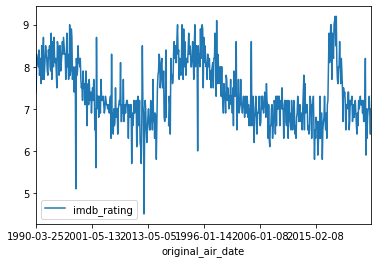

In [8]:
ratings_viz = data.loc[: , ["imdb_rating", "original_air_date"]]
ratings_viz = ratings_viz.set_index("original_air_date")
ratings_viz = ratings_viz.plot()
ratings_viz

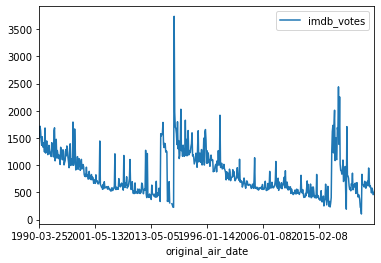

In [9]:
votes_viz = data.loc[: , ["imdb_votes", "original_air_date"]]
votes_viz = votes_viz.set_index("original_air_date")
votes_viz = votes_viz.plot()
votes_viz

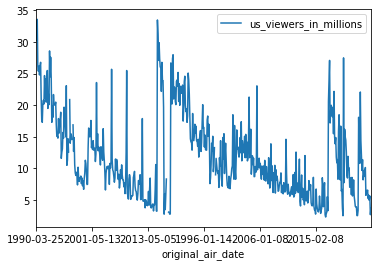

In [10]:
views_viz = data.loc[: , ["us_viewers_in_millions", "original_air_date"]]
views_viz = views_viz.set_index("original_air_date")
views_viz = views_viz.plot()
views_viz

In [43]:
#change x_values and y_values to regress different variables
def regression(df, title_name, y_label, x_label, xy):
    
    #set x and y values
    y_values = df["imdb_votes"].dropna()
    x_values = df["us_viewers_in_millions"].dropna()
    
    #run linregress function
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    #create regression line
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    #create scatter plot with labels, regression line and annotation
    plt.scatter(x_values,y_values, label='Teams', marker='o', c='red')
    plt.plot(x_values,regress_values,"blue")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,color="blue")
    plt.title(title_name)
    
    #print the r^2
    print(f"The r^2 is {rvalue}")

In [44]:
regression(data, "titile", "ebrlk", "slfd", (50,50))

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 594 and the array at index 1 has size 597